In [23]:
import os
import numpy as np
import pandas as pd
import pylab as pl 

from astropy.table import Table
from not_bright import not_bright

from selection.gdrops import gdrops
from selection.g_nondetect import g_nondetect
from selection.u_nondetect import u_nondetect

from uniform_magpriority import uniform_magpriority

from datamodel import datamodel
from snr import snr

In [2]:
# Safeguard, but should be unncessary. 
np.random.seed(seed=314)

# Area in g band (approx); [sq. deg.]
cosmos_garea = 7.84

# Load latest clauds catalog.
cat = Table.read('/global/cscratch1/sd/mjwilson/clauds/March2021/COSMOS_v9_v210225.fits')

print('Latest COSMOS catalog has {} sources.'.format(len(cat)))

# Limit to no stellar mask. 
cat = cat[cat['MASK'] == 0]

print('After stellar masking, COSMOS catalog has {} sources.'.format(len(cat)))

# Limit to the hsc imaging footprint. Table A1 of https://www.overleaf.com/read/wdtmwbwvnjgc.
cat = cat[cat['FLAG_FIELD_BINARY'][:,0] == True]

print('After limiting to the g imaging, COSMOS catalog has {} sources.'.format(len(cat)))

# Fainter than 17th mag in ugrizy. 
isin = not_bright(cat)

cat = cat[isin]

print('After removing bright sources, COSMOS catalog has {} sources.'.format(len(cat)))

Latest COSMOS catalog has 5263013 sources.
After stellar masking, COSMOS catalog has 4426066 sources.
After limiting to the g imaging, COSMOS catalog has 3696114 sources.
Excluding 114 bright source in u [10.29, 16.99].
Excluding 137 bright source in g [10.98, 17.00].
Excluding 213 bright source in r [13.53, 17.00].
Excluding 441 bright source in i [12.82, 17.00].
Excluding 892 bright source in z [12.32, 17.00].
Excluding 1393 bright source in y [12.05, 17.00].
Excluding a total of 1530 bright source.
After removing bright sources, COSMOS catalog has 3694584 sources.


In [8]:
cat = cat[cat['g'] < -40.]
cat = cat[cat['i'] > 22.5]
cat = cat[cat['i'] < 25.5]

cat = cat[cat['r'] > 0.0]

cat = cat[cat['i_err'] <= 0.2]

In [9]:
cat

ID,RA,DEC,TRACT,PATCH,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],A_WORLD,B_WORLD,KRON_RADIUS,THETA_WORLD,ELONGATION,ELLIPTICITY,EB_V,FWHM_WORLD_HSC_I,MU_MAX_HSC_I,CLASS_STAR_HSC_I,FLUX_RADIUS_0.25_HSC_I,FLUX_RADIUS_0.5_HSC_I,FLUX_RADIUS_0.75_HSC_I,FUV,NUV,u,uS,g,r,i,z,y,Yv,J,H,Ks,FUV_err,NUV_err,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,MAG_APER_2s_u,MAG_APER_2s_uS,MAG_APER_2s_g,MAG_APER_2s_r,MAG_APER_2s_i,MAG_APER_2s_z,MAG_APER_2s_y,MAG_APER_2s_Yv,MAG_APER_2s_J,MAG_APER_2s_H,MAG_APER_2s_Ks,MAGERR_APER_2s_u,MAGERR_APER_2s_uS,MAGERR_APER_2s_g,MAGERR_APER_2s_r,MAGERR_APER_2s_i,MAGERR_APER_2s_z,MAGERR_APER_2s_y,MAGERR_APER_2s_Yv,MAGERR_APER_2s_J,MAGERR_APER_2s_H,MAGERR_APER_2s_Ks,MAG_APER_3s_u,MAG_APER_3s_uS,MAG_APER_3s_g,MAG_APER_3s_r,MAG_APER_3s_i,MAG_APER_3s_z,MAG_APER_3s_y,MAG_APER_3s_Yv,MAG_APER_3s_J,MAG_APER_3s_H,MAG_APER_3s_Ks,MAGERR_APER_3s_u,MAGERR_APER_3s_uS,MAGERR_APER_3s_g,MAGERR_APER_3s_r,MAGERR_APER_3s_i,MAGERR_APER_3s_z,MAGERR_APER_3s_y,MAGERR_APER_3s_Yv,MAGERR_APER_3s_J,MAGERR_APER_3s_H,MAGERR_APER_3s_Ks,OFFSET_MAG_2s,OFFSET_MAG_3s,CONTEXT,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,AGE_BEST,EBV_BEST,EXTLAW_BEST,AGE_MED,MASS_MED,MASS_BEST,MASS_INF,MASS_SUP,SFR_MED,SFR_BEST,SFR_INF,SFR_SUP,SSFR_MED,SSFR_BEST,SSFR_INF,SSFR_SUP,LUM_NUV_BEST,LUM_R_BEST,LUM_K_BEST,OBJ_TYPE,COMPACT,STAR_FORMING,NrK,IRX_NrK,LIR_NrK,SFR_NrK,VMAX_uS,VMAX_g,VMAX_r,VMAX_i,VMAX_Ks
int64,float64,float64,int64,bytes3,int16,int16,bool,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1104,149.5303635331854,2.898832194731732,10054,"0,0",0,7,True .. False,0.0006281933,9.543384e-05,4.0,4.456143,6.5897484,0.84824914,0.016944478582303385,0.0014692373,24.1124,0.019728543,2.683715,4.1207905,5.5620403,-99.0,-99.0,-99.081,28.337,-99.062,28.454,22.78,26.299,-99.022,-99.021,-99.015,-99.01,-99.006,-99.0,-99.0,-99.0,1.467,-99.0,1.858,0.011,0.447,-99.0,1000.0,1000.0,1000.0,1000.0,99.0,29.346579,99.0,29.430052,23.743631,27.254652,99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.4667969,-99.0,1.8583984,0.011161804,0.44702148,-99.0,1000.0,1000.0,1000.0,1000.0,99.0,28.079613,99.0,29.568466,23.256437,26.925861,27.709875,-99.0,-99.0,-99.0,-99.0,-99.0,0.6113281,-99.0,2.8359375,0.009529114,0.44262695,2.0019531,1000.0,1000.0,1000.0,1000.0,-0.9302610546727976,-0.8514527359252629,1978.0,-23.505,-23.384,-23.099,-23.135,-23.124,-22.995,-23.007,-23.1,-23.138,-23.155,-23.146,-23.233,-22.965,-99.0,4.7895,4.7788,4.8011,8,859.046,1443.52,825.385,2,206,1,4.789,4.7716,4.8058,-99.0,4.78,4.789,4.789,1,50000000.0,0.0,0,50578600.0,9.36907,9.40599,9.32388,9.41469,1.70155,1.67818,1.63248,1.76957,-7.65239,-7.7278

Text(0, 0.5, 'Counts per $\\Delta z$=0.05')

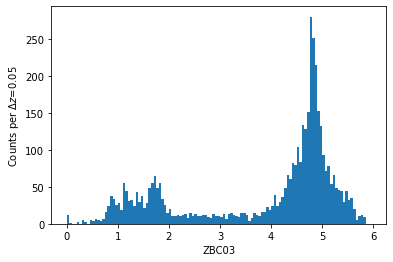

In [10]:
_ = pl.hist(cat['Z_BC03'], bins=np.arange(0.0, 6.0, 0.05))
pl.xlabel('ZBC03')
pl.ylabel('Counts per $\Delta z$=0.05')

Text(0, 0.5, 'r-i')

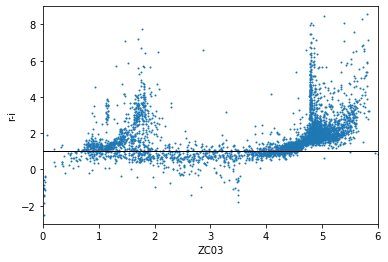

In [11]:
pl.plot(cat['Z_BC03'], cat['r'] - cat['i'], marker='.', lw=0.0, markersize=2)
pl.axhline(1.0, lw=1., c='k')
pl.xlim(0.0, 6.0)
pl.ylim(-3., 9.)
pl.xlabel('ZC03')
pl.ylabel('r-i')

In [12]:
np.mean(cat['Z_BC03'] < 1.5)

0.12797548904077305

In [25]:
snrs = snr(cat, band='r')

Text(0.5, 0, '$r$ snr')

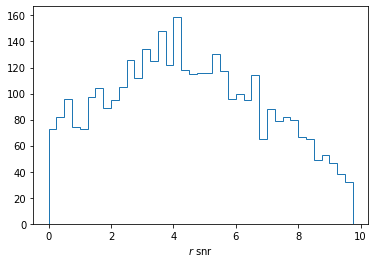

In [45]:
_ = pl.hist(snrs, bins=np.arange(0.0, 10.0, 0.25), histtype='step')
pl.xlabel('$r$ snr')

Text(0.5, 0, '$r_{err}$')

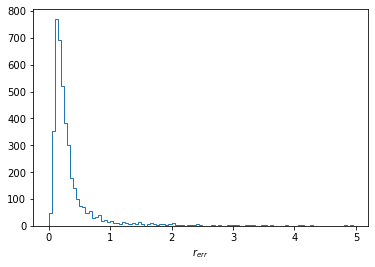

In [46]:
_ = pl.hist(cat['r_err'], bins=np.arange(0.0, 5.0, 0.05), histtype='step')
pl.xlabel('$r_{err}$')

In [50]:
1.086 / 0.2

5.43

In [49]:
np.mean(cat['r_err'] < 0.1), np.mean(cat['r_err'] < 0.2), np.mean(cat['r_err'] < 0.4)

(0.09521564930473722, 0.43931180768324296, 0.7650247466415272)

In [51]:
np.mean(cat['i_err'] < 0.1), np.mean(cat['i_err'] < 0.2), np.mean(cat['i_err'] < 0.4)

(0.8255950978081547, 0.999057270798963, 1.0)

# Done.